In [117]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import get_cmap
from netCDF4 import Dataset
import cartopy.crs as crs
from cartopy.feature import NaturalEarthFeature
import wrf
from wrf import (to_np, getvar, smooth2d, get_cartopy, cartopy_xlim,
                cartopy_ylim, latlon_coords, interplevel, extract_times)



In [118]:
#Load RUC Data
ncfile_RUC = Dataset('../brianjs/MCS_LLJ_study/RUC_Analysis/ruc_analysis_08_23_2015.nc')

In [119]:
#print(ncfile_RUC.variables['PRES'][0,:,0,0])

In [120]:
#Grab python variables from netcdf(RUC) variables
time = 15

temp_K = ncfile_RUC.variables['TT'][time,:,:,:] # Temperature in Kelvin
temp_C = temp_K - 273.15                        # Temperature in degC
pres = ncfile_RUC.variables['PRES'][time,:,:,:] / 100 # Pressure in hPa
rh = ncfile_RUC.variables['RH'][time,:,:,:] # Relative Humidity as a percentage

# Create Specific Humidity variable
def rh2qair(rh, temp_C, pres):
    es = 6.112 * np.exp((17.67 * temp_C) / (temp_C + 243.5))
    e = (rh / 100) * es
    qair = (0.622 * e) / (pres - (0.378 * e)) * 1000
    return(qair)

qair = rh2qair(rh, temp_C, pres) # Specific Humidity in g/kg
qair_900 = qair[5,:,:]           # Specific

lat = ncfile_RUC.variables['XLAT_M'][time,:,:]
lon = ncfile_RUC.variables['XLONG_M'][time,:,:]

In [121]:
# Create Figure
fig = plt.figure(figsize=(14,11))

# Set GeoAxes
ax = plt.axes(projection=crs.LambertConformal())
ax.set_extent([-87.5,-104.,32.,45.75])

In [122]:
# Add state boundaries & coastlines to plot
states_provinces = NaturalEarthFeature(
    category='cultural',
    name='admin_1_states_provinces_lines',
    scale='50m',
    facecolor='none')
ax.add_feature(states_provinces, edgecolor='black', linewidth=0.5)
ax.coastlines('50m',linewidth=0.8)

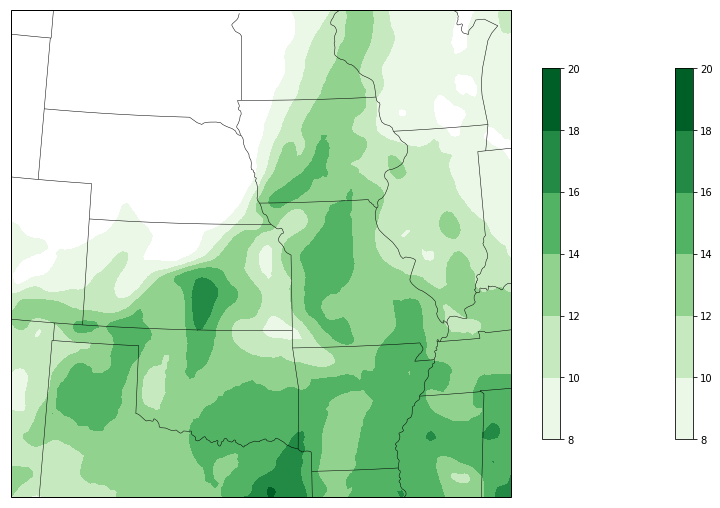

In [124]:
# Plot filled contours for sh at 900 hPa
levels_qair = [8,10,12,14,16,18,20]
cs1 = ax.contourf((lon),(lat),to_np(qair_900), levels_qair, 
                  transform=crs.PlateCarree(), cmap=get_cmap('Greens'))
plt.colorbar(cs1, ax=ax, shrink=0.62)
fig